<a href="https://colab.research.google.com/github/Pramila15/Deep-learning-diabetes-prediction/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential Api

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.5.0
Eager execution: True


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

# load the dataset
df = pd.read_csv('diabetes.csv')
print(df)
dataset = loadtxt('diabetes.csv', delimiter=',')
print(dataset)

        6  148  72  35    0  33.6  0.627  50  1
0       1   85  66  29    0  26.6  0.351  31  0
1       8  183  64   0    0  23.3  0.672  32  1
2       1   89  66  23   94  28.1  0.167  21  0
3       0  137  40  35  168  43.1  2.288  33  1
4       5  116  74   0    0  25.6  0.201  30  0
...    ..  ...  ..  ..  ...   ...    ...  .. ..
30675  10  101  76  48  180  32.9  0.171  63  0
30676   2  122  70  27    0  36.8  0.340  27  0
30677   5  121  72  23  112  26.2  0.245  30  0
30678   1  126  60   0    0  30.1  0.349  47  1
30679   1   93  70  31    0  30.4  0.315  23  0

[30680 rows x 9 columns]
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:

# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
#print("X",X)
#print("Y",y)

# define the keras model
model = Sequential()
model.add(Dense(9, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 81        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,490
Trainable params: 1,490
Non-trainable params: 0
_________________________________________________________________


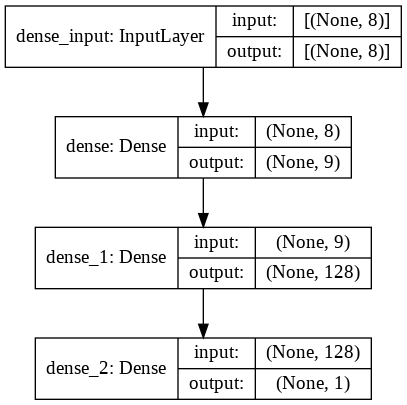

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#%30 test and %70 training portion

x_test = X[:9204]
x_train = X[9204:]

y_test = y[:9204]
y_train = y[9204:]
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=10,verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(x_test,y_test,batch_size=10,verbose=2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
2148/2148 - 2s - loss: 0.3461 - accuracy: 0.8446
Epoch 2/10
2148/2148 - 2s - loss: 0.3435 - accuracy: 0.8420
Epoch 3/10
2148/2148 - 2s - loss: 0.3387 - accuracy: 0.8472
Epoch 4/10
2148/2148 - 2s - loss: 0.3320 - accuracy: 0.8508
Epoch 5/10
2148/2148 - 2s - loss: 0.3306 - accuracy: 0.8484
Epoch 6/10
2148/2148 - 2s - loss: 0.3230 - accuracy: 0.8523
Epoch 7/10
2148/2148 - 2s - loss: 0.3195 - accuracy: 0.8561
Epoch 8/10
2148/2148 - 2s - loss: 0.3211 - accuracy: 0.8547
Epoch 9/10
2148/2148 - 2s - loss: 0.3151 - accuracy: 0.8564
Epoch 10/10
2148/2148 - 2s - loss: 0.3096 - accuracy: 0.8591
921/921 - 1s - loss: 0.2975 - accuracy: 0.8696
Accuracy: 86.96


# Functional API


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________
None


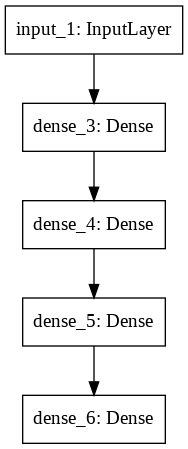

In [ ]:
# Multilayer Perceptron
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(8,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=10,verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(x_test,y_test,batch_size=10,verbose=2)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
2148/2148 - 3s - loss: 0.7970 - accuracy: 0.6952
Epoch 2/10
2148/2148 - 2s - loss: 0.5393 - accuracy: 0.7301
Epoch 3/10
2148/2148 - 2s - loss: 0.5123 - accuracy: 0.7489
Epoch 4/10
2148/2148 - 2s - loss: 0.4946 - accuracy: 0.7589
Epoch 5/10
2148/2148 - 2s - loss: 0.4803 - accuracy: 0.7684
Epoch 6/10
2148/2148 - 2s - loss: 0.4667 - accuracy: 0.7794
Epoch 7/10
2148/2148 - 2s - loss: 0.4565 - accuracy: 0.7837
Epoch 8/10
2148/2148 - 2s - loss: 0.4477 - accuracy: 0.7890
Epoch 9/10
2148/2148 - 2s - loss: 0.4386 - accuracy: 0.7954
Epoch 10/10
2148/2148 - 2s - loss: 0.4316 - accuracy: 0.7994
921/921 - 1s - loss: 0.4385 - accuracy: 0.7979
Accuracy: 79.79


# Custom Model
